# CS110 - Assignment 3 - Gene Mutations

In this program, a gene is described by a string of letters, with a letter being chosen from the set {A, C, G, T}. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by p_i, p_d and p_c, respectively.

Now, suppose the starting point is a given string which undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. These four newly created strings have also a single character changed from their respective parent strings. Some (not all) of these grandchildren also suffered an additional mutation, and 3 additional grand-grandchildren were created. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we got ten strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of ten strings:

In [3]:
Set_Strings = [
    (0, 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'),
   (1, 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'),
   (2, 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'),
   (3, 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'),
   (4, 'CAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'),
   (5, 'CACGGGCTCCGCATCTATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'),
   (6, 'CACGGGTCCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'), 
   (7, 'GGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'), 
   (8, 'CACGGGAATCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'), 
   (9, 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC')]

### 1. Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings.

In [4]:
def lcs(x,y):
    '''
    Adapted from CLRS
    Takes two strings x, y
    Returns longest common subsequence
    '''
    
    #For cleaner code
    m, n = len(x), len(y)
    
    #Table for storing subproblem solutions
    c = [[0 for col in range(n+1)] for row in range(m+1)]
    
    for i in range(1, m+1):
        
        for j in range(1, n+1):
            
            #Case 1
            if x[i-1] is y[j-1]:
                c[i][j] = c[i-1][j-1]+1
            
            #Case 2
            elif c[i-1][j] >= c[i][j-1]:
                c[i][j] = c[i-1][j]
            
            #Case 3
            else:
                c[i][j] = c[i][j-1]
    
    #Return largest common subsequence
    return c[m][n]

In [5]:
#Test it on a pair of strings
lcs(Set_Strings[0][1], Set_Strings[1][1])

74

### 2.How many LCSs are there in Set_Strings? Generate the table of the lengths of the LCS for every pair of strings in Set_Strings.

We want a nxn table where the index at the ith row and the jth column correspond to the lcs of the ith and jth string.

Observing that the lcs(a, b) is lcs(b, a), we only have to calculate one of the two values. This means it is sufficient to calculate (n^2)/2 longest common subseqences, as we can infer the other remaining results from previously calculated lcs's.

Lastly, we know that lcs(a, a) is a. Thus calculating the any lcs(i, j) where i is j is a waste of time. Consequently, the diagonal of the lcs table - the indices where i=j - will be replaced with "None".

Consequently, I will only dispay the lower triangle of the nxn matrix.

In [6]:
def lcs_table(set_strings):
    '''
    Takes a set of strings. Returns a table 
    with the longest common subsequence
    of each pair of strings.
    '''
        
    #n is length of set_strings
    n = len(set_strings)
    
    #Table to store lcs's
    table = [[None]*(col+1) for col in range(n)]
    
    
    for row in range(n):
        for col in range(row):
               
                #Avoid Checking LCS with itself, let None remain
                if col is row:
                    continue

                #Else, compute lcs(i,j)
                else:
                    table[row][col] = lcs(set_strings[row][1], set_strings[col][1])
    
    return table

In [7]:
#Present table nicely using Pandas
import pandas as pd

table = pd.DataFrame.from_records(lcs_table(Set_Strings))
table.style.background_gradient(cmap='summer').highlight_null(null_color="Black")

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


,0,1,2,3,4,5,6,7,8,9
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,None
1,74,nan,nan,nan,nan,nan,nan,nan,nan,None
2,76,67,nan,nan,nan,nan,nan,nan,nan,None
3,73,72,65,nan,nan,nan,nan,nan,nan,None
4,82,79,69,80,nan,nan,nan,nan,nan,None
5,84,71,82,72,74,nan,nan,nan,nan,None
6,89,69,82,68,74,95,nan,nan,nan,None
7,87,68,81,67,73,93,97,nan,nan,None
8,91,71,84,69,75,97,101,100,nan,None
9,91,71,84,69,75,97,101,100,104,None


Table 1. The above table represents the lcs of the pairs of strings in Set_Strings, where the entry at index[i][j] represents lcs(i, j). The table is heatmapped, where brighter colours correspond to higher values, for easier readability.

### 3.Manually examine the table you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with Set_Strings.

We have 10 strings, from which we intend to build a binary tree. Consequently, the tree will have 1 great grandparent (the root), 2 grandparents, 4 parents, and 3 children (1+2+4+3=10). That is, 4 generations of genes are represented in the 10 strings.

To generate the most probable genetic tree, we must infer some metric of judging probability. In the case of this assignment, we are expected to use LCS as the basis of this metric. To understand what would make sense, we must first understand how the genetic procedure works:

Between each generation, there may be characters may be deleted, inserted or changed. If I interpreted the instruction correctly, for each character in a string there is some probability that it will be deleted, inserted or changed. The probability associated with each of these operations is constant, and each character is independent in the sense that it is not affected by operations performed or not performed on another character. E.g the probability of the ith character being altered in some way is not affected by whether character i-1 was altered.

Let's examine how each of these operations could affect lcs(u, v). Where v and u are two strings, and u* the child of u. I.e. u* is u subjected to one generation of potential alterations: deleting, inserting, or changing.

1. Delete
Deleting an element may never, increase the lcs(u, v). However, it risks decreasing it by 1 if it deletes an element that is part of the lcs and for which there is no duplicate in the relevant subsequence of u. Disregarding the case of duplicates, the probability of this occuring is lcs(u, v)/len(u). The probability of no change is the complement, 1-lcs(u, v)/len(u). 

2. Insert
As we add a character to u to form u*, there is no way in which we could make the lcs(u*, v) shorter than lcs(u, v). It is however possible that the character added does not exist in the relevant subsequence of v, in that case lcs(u*, v) = lcs(u, v). Consequently, inserting a character may either increase the lcs by 1, or not change it at all.

3. Change.
Changing a character in u can either increase, decrease or have no effect on lcs(u, v). To show this, we can divide changing a character into two cases:

        A. When the character c is part of the lcs(u, v). In that case, if it changes to some character for which there does not exist a match in the relevant subsequence of v, lcs(u*, v) = lcs(u, v)-1. Otherwise, it must have changed from to another character for which there IS a match in the relevant subsequence of v. In that case lcs(u*, v) = lcs(u, v).

        B. When the character c is NOT part of lcs(u, v), it can change nothing or change to increase the lcs by one. Either it changes to a character for which there is a match in the relevant subsequence of v. If so, then lcs(u*, v) = lcs(u, v)+1. Else, there is no match, just like before, and lcs(u*, v) = lcs(u, v).

In summary, every operation - insertion, deletion, changing - entails some probability of the LCS will change. Consequently, every generation that passes increases the probability that offspring will be ever more different to the its predecessors. Consequently, we want a lcs-based metric to measure similarity of genes, given the fixed probabilities of operations. Relating this insight to the analysis of the operations and their effect on the lcs of a pair of genes, it is clear that we have an issue with just using pure lcs. To illustrate:
1. We want a metric that accurately reflects similarity/difference between a pair of genes.
2. We define a gene v1 equal to u[:-10], and a gene v2 = u + [1,2,3,4,5,6,7,8,9,10]. Both of these genes are 10 characters different from u, therefore they are equally different from u.
3. Consequently, we want a metric that shows similarity(u, v1) = similarity(u, v2). However, lcs(u, v1) = u-10 whilst lcs(u, v2) = u. Therefore, using pure lcs, it would seem that v2 is more similar to u than is v1, becuse the lcs is greater. The cause of this problem is the fact that whilst removing and inserting characters both make strings equally much more different - by 1 character to be exact - inserting can only increase lcs and deleting can only decrease lcs. Thus, we have showed that absolute lcs is biased towards longer genes/strings.

To account for this asymmetry, I will weight the lcs by the length of the strings. Specifically, we will divide the lcs by the average of the lengths of the two genes. This way, two strings of length 10 with lcs=9 will seem equally similar to two strings of length 100 with 90 characters in common: 0.9 similar, which is what we want. 

Furthermore, we know that the probability of each operation is constant across all characters, and thus the expected number of operations on a gene when it replicates is directly proportional to its length. 

Crucially, it must be noted that as the mutations occuring between each generation are completely stochastic, any tree that can be formed with these 10 nodes is POSSIBLE in principle. However, each has some probability associated with it. The aim then, is to build the most probable tree.

Lastly, as every generation carries with an expected decrease in the lcs, we expect that the more generations that separate two nodes, the lower their proportional lcs should be. That is, we expect the proportional lcs between two nodes separated by i generations to be higher than nodes separated by i+1 generations. It follows, then, that maximising the proportional lcs for every parent-child relationship in the genealogy tree will yield the MOST probable genealogy tree. Note: As lcs(child, parent) = lcs(parent, child), it suffices to traverse the tree in one direction.

To do this, we begin by calculating the table of the proportional lcs for every pair of nodes. Because I personally think it is easier to read (and I am expected to manually produce a tree so I have to read), I will display both the upper and lower triangle of the nxn table even though they are symmetric.

In [8]:
def lcs_proportion_table(set_strings):
    '''
    Takes a set of strings. Returns a table 
    with the longest common subsequence
    of each pair of strings.
    '''
        
    #n is length of set_strings
    n = len(set_strings)
    
    #Table to store lcs's
    table = [[None for col in range(n)] for row in range(n)]
    
    
    for row in range(n):
        for col in range(n):
                
                #Avoid Checking LCS with itself, let None remain
                if col is row:
                    continue
                    
                #If row > col, lcs(col, row) has already been computed
                elif row > col:
                    table[row][col] = table[col][row]

                #Else, compute lcs(i,j)
                else:
                    avg_len = (len(set_strings[row][1]) + len( set_strings[col][1]))/2
                    table[row][col] = round(lcs(set_strings[row][1], set_strings[col][1])/avg_len, 3)
    
    return table

#Present table nicely using Pandas
table = lcs_proportion_table(Set_Strings)

import pandas as pd
display_table = pd.DataFrame.from_records(lcs_proportion_table(Set_Strings))
display_table.style.background_gradient(cmap='summer').highlight_null(null_color="Black")

/Users/oscarengelbrektson/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


,0,1,2,3,4,5,6,7,8,9
0,nan,0.779,0.772,0.745,0.841,0.785,0.886,0.87,0.883,0.892
1,0.779,nan,0.717,0.774,0.854,0.696,0.723,0.716,0.724,0.732
2,0.772,0.717,nan,0.674,0.719,0.777,0.828,0.822,0.828,0.836
3,0.745,0.774,0.674,nan,0.838,0.686,0.69,0.684,0.683,0.69
4,0.841,0.854,0.719,0.838,nan,0.708,0.755,0.749,0.746,0.754
5,0.785,0.696,0.777,0.686,0.708,nan,0.884,0.869,0.882,0.89
6,0.886,0.723,0.828,0.69,0.755,0.884,nan,0.965,0.976,0.985
7,0.87,0.716,0.822,0.684,0.749,0.869,0.965,nan,0.971,0.98
8,0.883,0.724,0.828,0.683,0.746,0.882,0.976,0.971,nan,0.99
9,0.892,0.732,0.836,0.69,0.754,0.89,0.985,0.98,0.99,nan


It is really hard to construct a tree by hand, as the space of possible combinations is very large and hard to explore manually. Consequently, I expect the resulting tree to be suboptimal as judged by either of my metrics.

### 4.Write an algorithm (in pseudocode, or preferably in working Python code) for the general case, which takes as input N sequencing strings and outputs a genealogy binary tree associated with the N strings that best exposes the relationships between them.

Procedure:
Randomly generate possible tree from N sequencing strings.
For each, Evaluate the fitness of tree and compare to the highest fitness tree previously encountered.
(This is the algorithmic equivalent of throwing spaghetti at the wall and seeing what sticks)

Strategy/approach:
Keep nodes in lists, 
use the fact that the left child of i = i*2+1, right child = i*2+2, to evaluate tree.
Implicit in this approach is that nodes at index 5 and 6 never have children, node at index 3 always has 2 children and node at index 4 always has 1. I consider this to be acceptable as every possible, practically unique (i.e. in terms of node connection) of a 10 node binary tree can be constructed this way.

In [9]:
import random

def gene_tree_evaluator(tree, proportion_table): 
    
    score = 0
    
    #The 6th-10th nodes don't have children
    #The 4th node only has 1
    for i in range(4):
        l = 2*i + 1 #index of left child
        r = 2*i + 2 #index of right child
                
        #Find the lcs of the strings corresponding to the indices in the random tree
        l_score = proportion_table[tree[i][0]][tree[l][0]]
        r_score = proportion_table[tree[i][0]][tree[r][0]]
        
        score += l_score + r_score
    
    #Add the connection between node 4 and its child 9
    score += proportion_table[tree[4][0]][tree[9][0]]
    
    return score

def gene_tree_generator(set_strings, iterations):
    
    #Generate proportion table for fast look-ups
    table = lcs_proportion_table(set_strings)
    
    
    #Evaluate tree of initial input as initial best

    best_tree = [0]
    
    
    for i in range(iterations):
        
        #Generate randomly shuffled tree by sampling without replacement
        #Bootstrap tree
        random_tree = random.sample(set_strings, len(set_strings))
        
        #Evaluate its score
        score = gene_tree_evaluator(random_tree, table)
        
        #If better than previous best, replace
        if score > best_tree[-1]:
            random_tree.append(score)
            best_tree = random_tree
    
    return best_tree

#Generate and evaluate 1million random trees.
gene_tree_generator(Set_Strings, 100000)

[(0,
  'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'),
 (9,
  'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (4,
  'CAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'),
 (6,
  'CACGGGTCCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (8,
  'CACGGGAATCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (3,
  'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'),
 (1,
  'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'),
 (5,
  'CACGGGCTCCGCATCTATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'),
 (2,
  'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCA

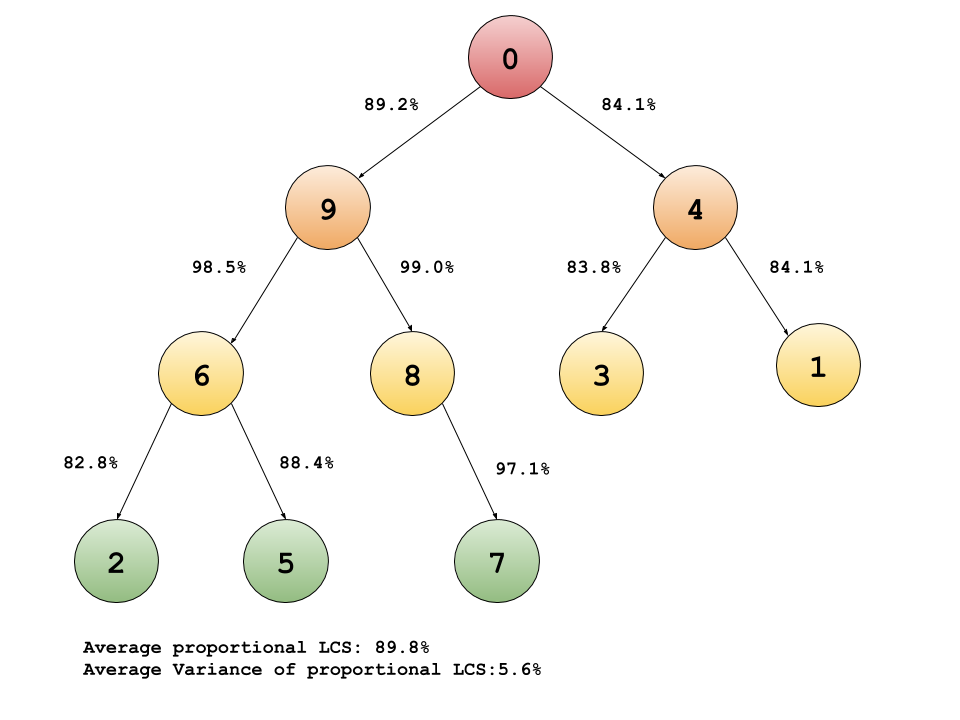

Visualization of the tree with maximum average proportional lcs. The percentages at each edge correspond to the proportional lcs of the two strings it connects. The numbers inside each node correspond to the number of the string as defined in Set_Strings. The average variance is the average difference between the absolute value of the difference between the average proportional lcs and the proportional lcs of each parent-child pair.

###### Alternative fitness function: Minimize inter-generational proportional-lcs variance.

WE define an operation to be a change, insertion or a deletion. 
I.e. P(operation) = P(change)+P(insertion)+P(deletion).
We know that the probability of each operation is constant across the set of strings and generations, therefore the probability of any operation is too. Thus, we have P(operation) = k, where k is some constant 0<=k<=1.
We know that proportional_lcs(u, u) = 1 (as every character matches). Then, E(lcs(u, v)) = 1-k*c where u and v are separated by one generation and c is the probability that an operation affects lcs(u, v). For simplicity of analysis, we assume c=1.

Then, whilst k is unknown, we know it is constant. Consequently, the difference between each parent and child is in expectation constant and therefore equal. Consequently, I believe this to be a more appropriate fitness function for genealogy tree evaluation: we define a fitness function where we are looking for the tree with the lowest average absolute deviation from the average proportional lcs for parents and children.
I.e. we want the tree with the most uniform distribution of prop_lcs(child, parent) for every parent-child pair.

In [23]:
def gene_tree_evaluator1(tree, proportion_table): 
    
    score = []
    
    #The 6th-10th nodes don't have children
    #The 4th node only has 1
    for i in range(4):
        l = 2*i + 1 #index of left child
        r = 2*i + 2 #index of right child
                
        #Find the lcs of the strings corresponding to the indices in the random tree
        l_score = proportion_table[tree[i][0]][tree[l][0]]
        r_score = proportion_table[tree[i][0]][tree[r][0]]
        
        score.append(l_score)
        score.append(r_score)
    
    #Add the connection between node 4 and its child 9
    score.append(proportion_table[tree[4][0]][tree[9][0]])
    
    avg_score = sum(score)/len(score)
    avg_abs_diff = 0
    for item in score:
        avg_abs_diff += abs(item-avg_score)
    
    return avg_abs_diff/len(score)

def gene_tree_generator1(set_strings, iterations):
    
    #Generate proportion table for fast look-ups
    table = lcs_proportion_table(set_strings)
    
    
    #Evaluate tree of initial input as initial best

    best_tree = [float("inf")]
    
    
    for i in range(iterations):
        
        #Generate randomly shuffled tree by sampling without replacement
        #Bootstrap tree
        random_tree = random.sample(set_strings, len(set_strings))
        
        #Evaluate its score
        score = gene_tree_evaluator1(random_tree, table)
        
        #If better than previous best, replace
        if score < best_tree[-1]:
            random_tree.append(score)
            best_tree = random_tree
    
    return best_tree

#print(Set_Strings)
gene_tree_generator1(Set_Strings, 1000000)

[(8,
  'CACGGGAATCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (0,
  'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'),
 (2,
  'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'),
 (4,
  'CAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'),
 (7,
  'GGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (6,
  'CACGGGTCCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (9,
  'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'),
 (3,
  'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'),
 (1,
  'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'),
 (5

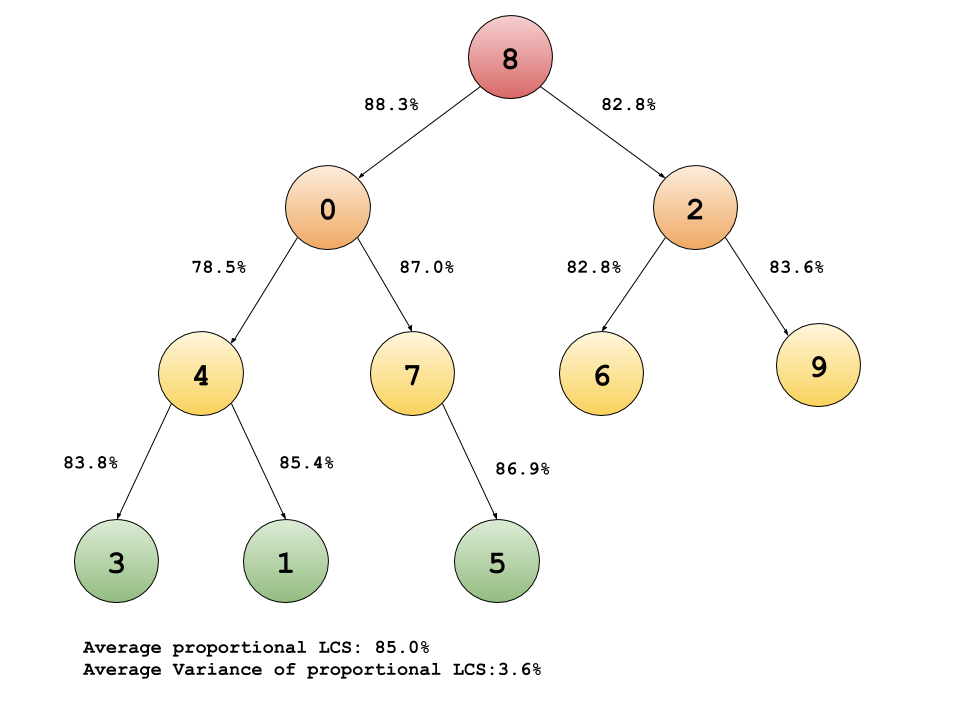

Visualization of the tree with minimum variance. The percentages at each edge correspond to the proportional lcs of the two strings it connects. The numbers inside each node correspond to the number of the string as defined in Set_Strings. The average variance is the average difference between the absolute value of the difference between the average proportional lcs and the proportional lcs of each parent-child pair.

### 5.Write any strengths or weaknesses of your suggested algorithm.


#### Strengths
**Optimality of solution: Benefits of Randomization** <br>
Assuming our randomzation approach is truly random:<br>
Depending on context, applying a randomized solution approach can be quite beneficial. The quality of set of possible solutions, as judged by our fitness function, follows some distribution (crucially, it does not matter which). Drawing n random sample with replacement from this distribution, in expectation the best of those samples will be in the 100/n th percentile. I.e. if we draw 100 random samples, we can expect the best of those samples to be in the 99th percentile, if we draw 1000 we can expect it to be in the 99.9th percentile and so on. There are many contexts where this is good enough -e.g. if speed is crucial, and it suffices to do well most of the time - in such scenarios this algorithm will produce results much faster than any form of exhaustive search.

To illustrate, the possible number of permutations of a binary tree of size n is f(n)=((2n)!)/(((n+1)!)*(n!)). Which grows exponentially. Consequently, whilst it is within the grasp of our computational power to examine all possible permutations for a tree of 10 genes as f(10) = 16796, it cannot quickly gets ourscaled as f(20)=6564120420, and f(30) = 3814986502092304 and so on. <br> If we are constained to evaluating at most k different trees (because of time or computational restrictions of some sort). And k>>f(n), then it is much preferable to evaluate k random trees than it is to examine e.g. the first k trees. Thus, randomized approach provides desirable statistical qualities of expected quality of the solution that hold independent of the size of the solution space.



#### Weaknesses
**Optimality of solution: Drawbacks of Randomization** <br>
However, a distinct weakness of a randomized approach, is that we can never be sure that we have found an optimal solution. In the worst case, we never will - even if we draw 10^10 samples from a solution set of 10, we are not guaranteed to find the best solution. Consequently, in situations where it is important that THE BEST solution is found every time a randomized approach like this is not appropriate - i.e. it does not suffice that we expect to find a solution in the 100/n th percentile of the solution space, where n is the number of random solutions evaluated.
<br>
<br>
**Validity of fitness function: How good a measure of similarity is lcs?**<br>
Inserting may only increase the lcs, whilst deleting may only shorten it. Hence, our metric is biased in the sense that it is likely to judge a string to which 10 characters have been added to be more similar than one to which 10 characters have been deleted. When, in fact, they are both 10 characters different from the original! To address this weakness, we weight the lcs by the average length of strings-

However, even after our weighting the lcs by the average length of strings, it is not clear that this is the *best* available metric to determine the similarity of two strings. Three concrete examples of why:
<br>
<br>
1. Assume we start with string u. String u produces two children v1 and v2, where v1 is u but with the last ten characters removed and v2 is u with 5 random characters inserted at the end of u. In this case, both have had the same number of operations applied to them and it thus seems that they should have the same score as judged by our metric. However,
If u = 10, v1 = u-5 = 5, and v2 = u+5 = 15. Then <br>
(1). prop_lcs(u, v1) = 5/(5+10)/2 = 5/7.5<br>
(2). prop_lcs(u, v2) = 10/(10+15)/2 = 10/12.5 = 5/6.25<br>
-> prop_lcs(u, v2) > prop_lcs(u, v1)<br>
Thus, our metric still falls short in this regard.
<br>
<br>
2. It offers no information on which specific operations were made - or where they were made - between generations. Consequently, it does not offer the information necessary to answer questions along the lines of e.g. question 7.

### 6.What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.


To produce genealogy binary trees, (1) I first generate a table of proportional lcs's for each pair of nodes, (2) I then shuffle the set of strings to simulate a random tree, (3) lastly I evaluate the performance of the tree according to the fitness function - (3a) maximum lcs or (3b) minimum variance. Steps 2 and 3 are repeated a desired number of times, depending on the expected optimality of the result sought after. <br>
The computational complexity can thus be expressed as T(n, m) = f(n, m) + k(h(n)+g(n)), where f(n) is the time it takes to calculate the table of lcs pairs of n genes with length m, h(n) the time it takes to shuffle a list of n genes, g(n) the time it takes to evaluate the performance of a tree with n nodes, and k the number of times the randomization+evaluation process is repeated. <br> For simplicity of analysis, we assume all genes have length m and that the number of genes n is a square of 2 (each level of the genealogy tree is complete).
<br>
1. There are (n^2)/2 unique pairs of genes in a set of n genes. For each unique pair x and y, we must calculate lcs(x, y). To calculate lcs(x, y), we iterate through all elements m elements in y for every element in x, of which there are also m. Consequently, there are m^2 executions of the inside of that loop: inside each loop, we a series of two-way comparisons of cost O(1). Thusly, costs m^2*O(1) = m^2 to compute lcs(x, y). We perform one such calculation of cost m^2 for every pair of genes in our set of n genes. Consequently, the cost of generating the lcs table is m^2*(n^2)/2, which asymptotically simplifies to O(m^2*n^2).
<br>
<br>
2. We generate random permutations of the set of genes by randomly sampling genes without replacement. Each sample costs O(1) and we draw n samples. The cost of the randomization procedure therefore is O(1)*n = O(n).
<br>
<br>
3. a) To evaluate the performance of a tree, we examine the lcs of every parent-child pair. As n is a square of 2, each parent has exactly two children. All nodes except the terminal nodes have two children, terminal nodes have 0 children. There are (n+1)/2 terminal nodes, and therefore (n-1)/2 parent nodes. Consequently, since each parent has two children 2(n-1)/2=n-1 edges must be examined - equivalent to all edges being examined. Each such comparison consists of a look-up in the lcs table, which takes constant time O(1). Consequently, the evaluation procedure takes O(1)*(n-1) = O(n) time. <br> In the case where minimum variance is evaluated, a constant number of operations is computed on the result of the lcs table look-up, asymptotic time complexity is still O(1) and so the overall complexity is not affected.
<br>
<br>

4. Steps 2 and 3 are repeated k times. Where k is context dependent and only indirectly a function of N (completely independent of M), as explained in previous Q.5. However, to provide value, k should grow as some constant function of n, although not necessarily at a 1:1 rate. We rewrite k = nc, where c is that linear function of n.
<br>
<br>
We can thus rewrite T(n, m) = f(n, m) + k(h(n)+g(n)) = O(m^2*n^2) + k(O(n)+O(n)) = O(m^2*n^2) + 2cnO(n) = O(m^2*n^2) + O(n^2) = O(m^2*n^2), as O(m^2*n^2) is the dominant term as m and n become large. The time complexity of the algorithm is therefore O(m^2 * n^2).

### 7.How would you estimate the probabilities of insertions, deletions, and mutations, p_i, p_d and p_c, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for p_i, p_d and p_c.)

The set of operations O contains insertions I, deletions D, changes C. We define "no operation" N to be a part of this set.
Assuming that the probability of each operations is constant for all characters in a string. That is, (1) it for at every character there is some probability that an operations occurs and (2) this probability is independent of whether any other node has or has not been subject to an operation. From (1) follows that a string with more charactars will, in expectation, be subject to a higher number of operations.

For every character, I, D, C or N must occur. Consequently, P(N)+P(I)+P(D)+P(C) = 1 for each character. We do not know any of these quanitites a priori. However, we can estimate them, by counting the number of times an operation occured, and dividing by the total number of operations. 
That is, <br>

P(I) = #I/#O<br>
P(D) = #D/#O<br>

And so on. Similarly, we can rearrange P(N)+P(I)+P(D)+P(C) = 1 to derive the solution to one of the probabilities given the other three probabilities are known, e.g. <br>

P(I) = 1-(P(N)+P(D)+P(C))

The larger the sample size, the more confidence we can have in our estimates and the tighter the confidence intervals will become. <br>

Unfortunately, our current lcs-based approach is unable to infer which operations have occured. Consequently, it does not provide the information necessary to estimate these probabilties. Therefore, I will be employing a python package to count the number of operations that separates each parent-child pair - this is known as edit distance. More formally, this measures how many operations must be made to transform the parent into the child. I would be modifying the code to disentangled which specific operations were needed, in what quanitity, to make the transformation happen.


Furthermore, there is a problem of uncertainty involved in this type of estimation. This is because all quantities #I, #D, #C, #N are dependent on the structure genealogy tree. If we arrange the tree in two different ways, and count the number operations performed and which operations, I will likely get two very different answers. This is because it is dependent on the similarity of the parent-child pairs in the tree, which, in turn is dependent on the structure of the tree. As I use a measure of similarity of between the parent-child pairs to determine which three is the most probable, I would not be examining the rate of each operation across all possible trees. Rather, I would be performing it only on the best tree, as judged by my second fitness function (minimal variance), as I believe that tree to be the most probable. <br>
A drawback of this approach is that I will have much to few data points to achieve meaningful estimates. A possible methodology to work around this would be to calculate the probabilities of each operation for every tree in the set of possible trees for these 10 strings, and then weight each set of probabilities for the operations by the probability of the associated tree being the "real" tree. I.e. <br> 1/n(Sum([probabilities of each operation]*P(tree)) for tree in possible_trees).
<br>

### HC Appendix

**#Decision Selection**
I reason about the characteristics of the system - how genes change over generations, the characteristics of the lcs etc - to define and justify an appropriate framework for deciding which genealogy tree is most probable. 

**#Context**
I effectively critique the application of standard lcs as a metric for similarity in the context gene mutations, as it does not decrease similarity when characters are inserted. On a separate application, in strengths and weaknesses, I clearly make the case for in which contexts a randomized algorithm like the one I implemented is appropriate, by analyzing multiple aspects of each context.

**#Confidence**
Throughout this assignment, I do my best to reflect the appropriate amoung of confidence in my expressions. When dealing with mathematical fact, I make sure to communicate with the corresponding level of confidence: see, for instance, my complexity analysis for a concrete example. When it is an interpretive question, I make sure to add due uncertainty qualifiers  such as "I think", "we may never be certain" (excerpt from weaknesses of randomization)

**#Sampling** & **#Distributions**
In justifying the application of a randomized algorithmic approach to this problem, I draw upon knowledge of sampling and distributions. I identify that this is a random sampling without replacement, and use the properties of this methodology to prove that, regardless of the underlying distribution of the solution set, we can make claims about the expected quality of our randomized solutions. I go on to analyze the practical implications of this and compare the resulting performance to an algorithm using an exhaustive search method.

**#Probabilities**
I clearly define a framework for estimating the probabilities of each of the operations, clearly stating the assumptions on which it depends and justifying why it follows therefrom in clear steps.